In [129]:
from pyexpat import features

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

pd.options.display.float_format = '{:20,.2f}'.format
# display all columns by default 
pd.set_option('display.max_columns', 999)

# Data Exploration

In [130]:
# Load the data
df = pd.read_csv('data/customer_segmentation.csv') 
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,"62,513.00",0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,"55,635.00",0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,"33,454.00",1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,"30,351.00",1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,"5,648.00",1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [132]:
#describing our numerical data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,"2,240.00","2,240.00","2,216.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"5,592.16","1,968.81","52,247.25",0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,"3,246.66",11.98,"25,173.08",0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,"1,893.00","1,730.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,"2,828.25","1,959.00","35,303.00",0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,"5,458.50","1,970.00","51,381.50",0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,"8,427.75","1,977.00","68,522.00",1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,"11,191.00","1,996.00","666,666.00",2.00,2.00,99.00,"1,493.00",199.00,"1,725.00",259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


Everything here looks fine, aside from some entries missing incomes.

In [133]:
#describing our categorical data
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [134]:
df[df["Income"].isnull()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


Although we can still infer which customer made a purchase without the income data, income is likely a significant factor in determining how much a customer spends. We will drop these rows.

In [135]:
# Drop rows with missing income
df = df.dropna(subset=['Income'])

In [136]:
#checking for any duplicate entries
df.duplicated().sum()

0

In [137]:
#checking for any missing values now that we have removed the missing income entries
df.isnull().sum()   

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Data Visualization

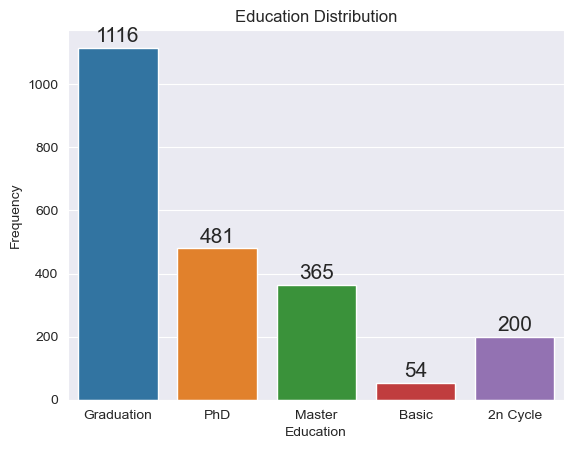

In [138]:
# displaying the education distribution
axes = sns.countplot(data=df, x='Education')
# displaying the frequency of each category
for bar in axes.patches:
    axes.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Education Distribution')
plt.ylabel('Frequency')
plt.show()

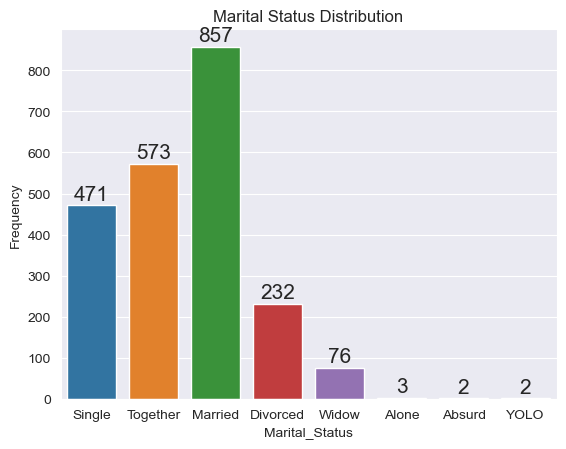

In [139]:
#displaying the marital status distribution
axes = sns.countplot(data=df, x='Marital_Status')
# displaying the frequency of each category
for bar in axes.patches:
    axes.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
        
plt.title('Marital Status Distribution')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Number of Children in Home by Marital Status')

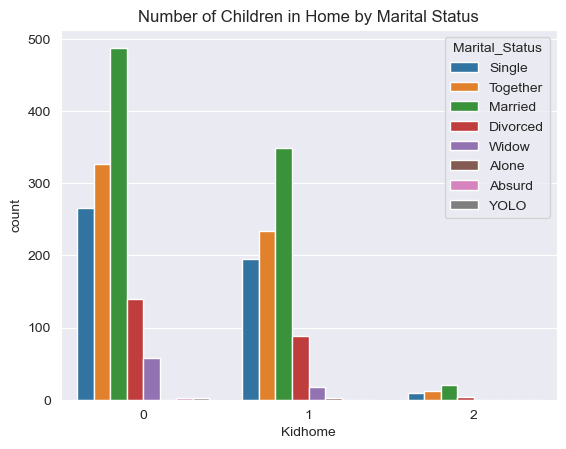

In [140]:
# displaying the number of children in the home based on martial status
sns.countplot(data=df, x='Kidhome', hue='Marital_Status')
plt.title('Number of Children in Home by Marital Status')

<Axes: xlabel='Teenhome', ylabel='count'>

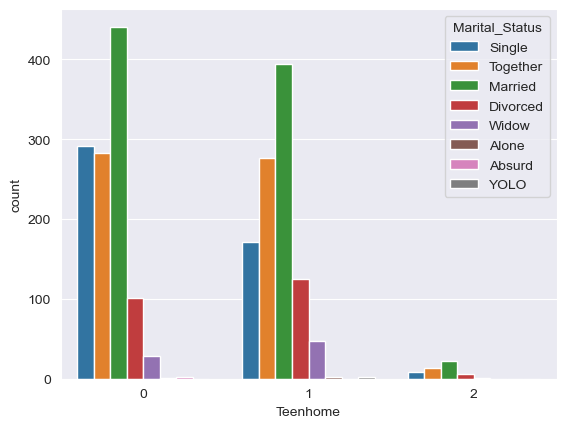

In [141]:
# and the same for the amount of teenagers in the home
sns.countplot(data=df, x='Teenhome', hue='Marital_Status')

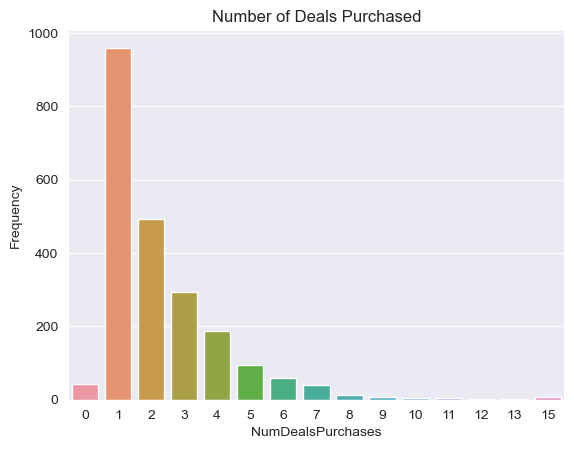

In [142]:
# displaying the number of purchases made by each customer
sns.countplot(data=df, x='NumDealsPurchases')
plt.title('Number of Deals Purchased')
plt.ylabel('Frequency')
plt.show()

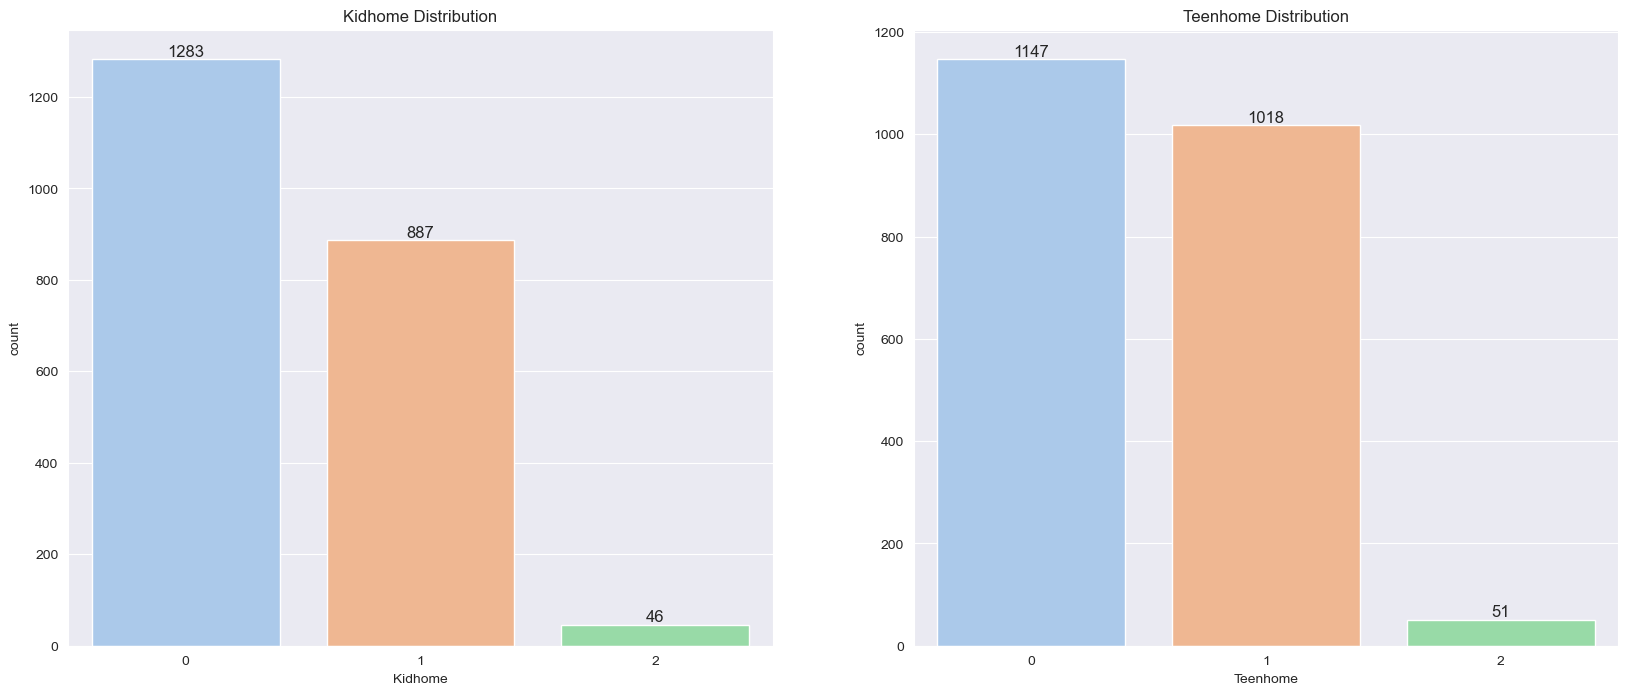

In [143]:
fig , Axes = plt.subplots(nrows=1 , ncols=2, figsize=(20,8))

#displaying the distribution of the number of children in the home
axes = sns.countplot(data= df, x='Kidhome', palette= 'pastel', ax= Axes[0])
Axes[0].set_title('Kidhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2. , y = height , s=int(height), ha='center', va='bottom',fontsize=12)



#displaying the distribution of the number of teenagers in the home
axes = sns.countplot(data=df, x='Teenhome', palette='pastel', ax= Axes[1])
Axes[1].set_title('Teenhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2, y = height, s= int(height), ha='center', va='bottom', fontsize=12)

plt.show()

/Users/emmanuelaraba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


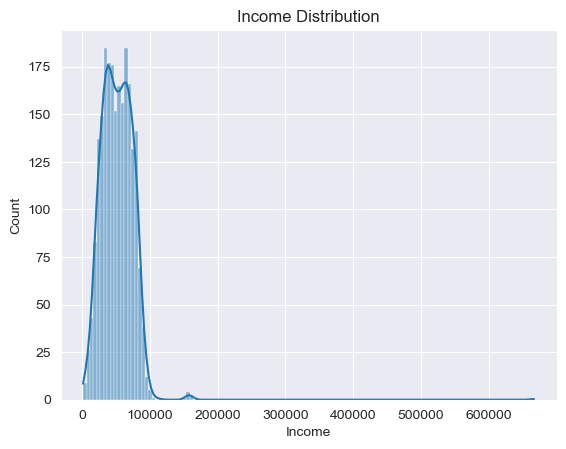

<Figure size 2000x1000 with 0 Axes>

In [144]:
# income distribution among customers
sns.histplot(data=df, x='Income', kde=True)
plt.title("Income Distribution")
plt.figure(figsize=(20, 10))
plt.show()

Text(0.5, 1.0, 'Income Distribution')

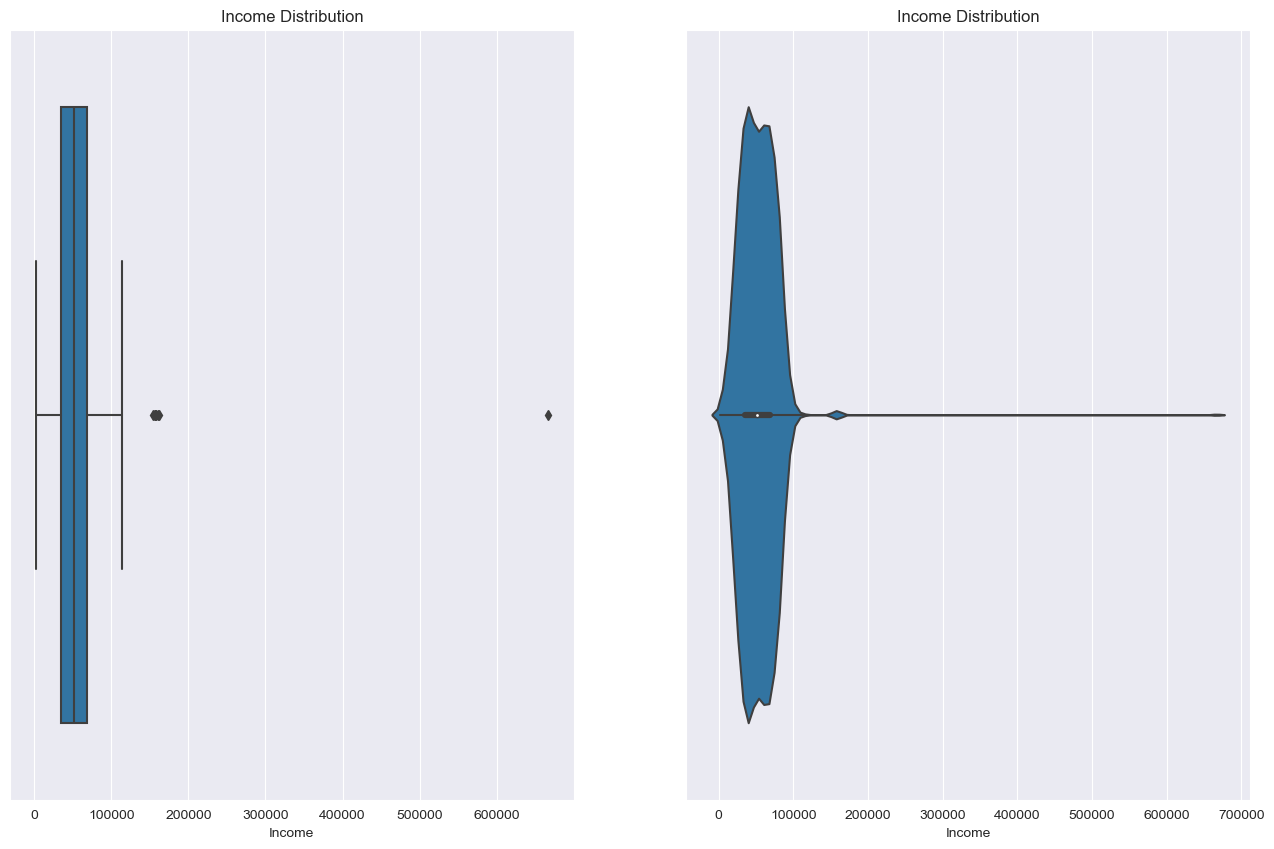

In [145]:
# visualzing the income distrbution to see outliers easier
plt.figure(figsize=(16, 10))    
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Income')
plt.title('Income Distribution')

plt.subplot(1,2,2)
sns.violinplot(data=df, x='Income')
plt.title('Income Distribution')    


Based on this, we can clearly see that there is one large outlier in the income data; a single customer with an income of over 600,000. We will remove this outlier.

In [146]:
df = df[df['Income'] < 150000]  

Text(0.5, 1.0, 'Income Distribution')

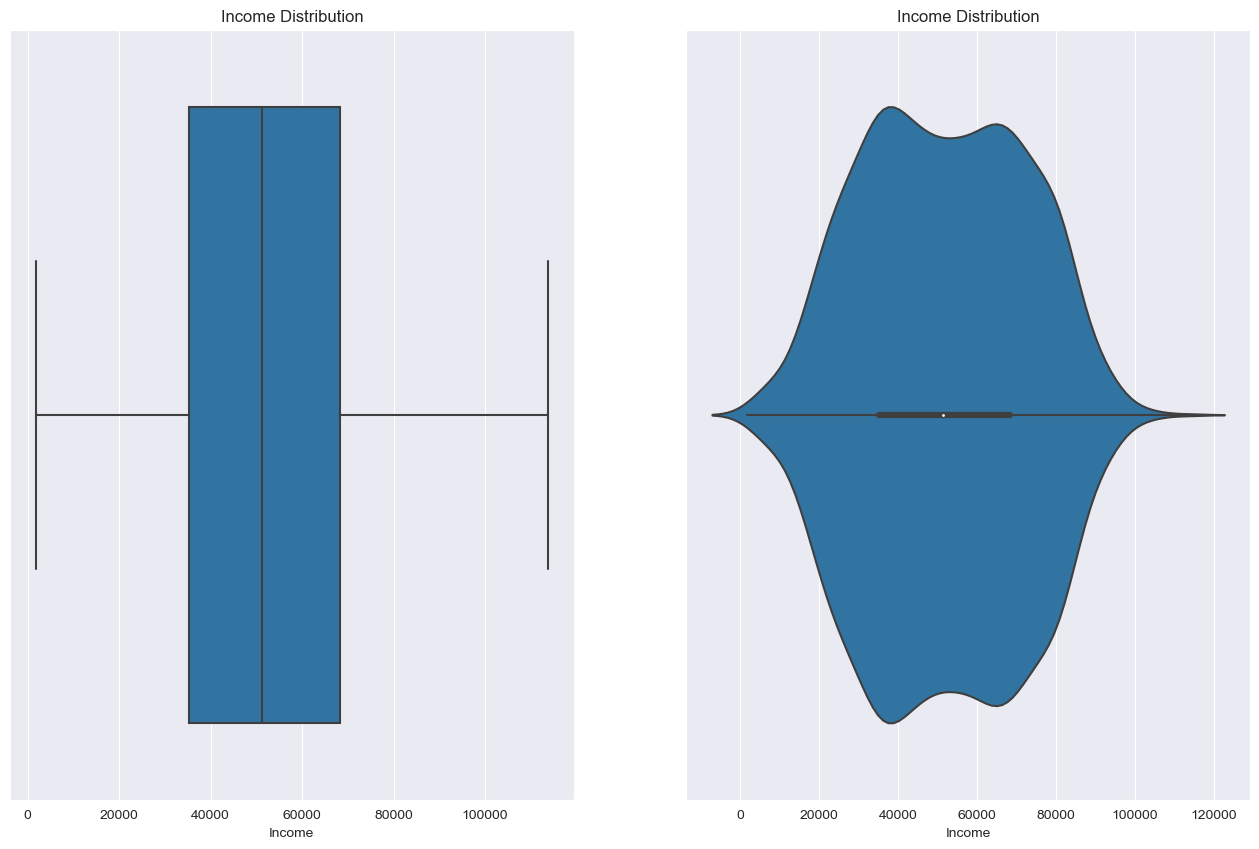

In [147]:
# replotting the income distribution
plt.figure(figsize=(16, 10))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Income')
plt.title('Income Distribution')

plt.subplot(1,2,2)
sns.violinplot(data=df, x='Income')
plt.title('Income Distribution')    

Much better

## Feature Engineering


In [148]:
# we can use the year of birth to calculate the age of the customer
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# we can also make a column for the total number of purchases made by each customer
df['TotalPurchases'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalPurchases
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,27
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,776
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,53
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,422


In [157]:
# we also need to encode the categorical columns
encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalPurchases
0,5524,1957,2,4,"58,138.00",0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,2,4,"46,344.00",1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,27
2,4141,1965,2,5,"71,613.00",0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,776
3,6182,1984,2,5,"26,646.00",1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,53
4,5324,1981,4,3,"58,293.00",1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,422


In [158]:
# Now we can choose which columns to use for clustering
features = ['Income', 'Age', 'TotalPurchases', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Recency', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

cluster_df = df[features]   
cluster_df

,Income,Age,TotalPurchases,Education,Marital_Status,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,"58,138.00",68,1617,2,4,0,0,58,8,10,4,3,635,88,546,172,88,88
1,"46,344.00",71,27,2,4,1,1,38,1,1,2,2,11,1,6,2,1,6
2,"71,613.00",60,776,2,5,0,0,26,8,2,10,1,426,49,127,111,21,42
3,"26,646.00",41,53,2,5,1,0,26,2,0,4,2,11,4,20,10,3,5
4,"58,293.00",44,422,4,3,1,0,94,5,3,6,5,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,"61,223.00",58,1341,2,3,0,1,46,9,3,4,2,709,43,182,42,118,247
2236,"64,014.00",79,444,4,5,2,1,56,8,2,5,7,406,0,30,0,0,8
2237,"56,981.00",44,1241,2,2,0,0,91,2,3,13,1,908,48,217,32,12,24
2238,"69,245.00",69,843,3,5,0,1,8,6,5,10,2,428,30,214,80,30,61


In [159]:
# Features need to be scaled before we can cluster them - so that each of them contributes equally to the distance calculations
numerical_features = ['Income', 'Age', 'TotalPurchases', 'Recency', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df[numerical_features])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)
cluster_df[numerical_features] = scaled_df
cluster_df.head()

/var/folders/v7/43g09x6d23sb35sxhnq0gwm40000gn/T/ipykernel_42927/2494459720.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df[numerical_features] = scaled_df


,Income,Age,TotalPurchases,Education,Marital_Status,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.31,68,1617,2,4,0,0,58,8,10,4,3,635,88,546,172,88,88
1,-0.26,71,27,2,4,1,1,38,1,1,2,2,11,1,6,2,1,6
2,0.96,60,776,2,5,0,0,26,8,2,10,1,426,49,127,111,21,42
3,-1.21,41,53,2,5,1,0,26,2,0,4,2,11,4,20,10,3,5
4,0.32,44,422,4,3,1,0,94,5,3,6,5,173,43,118,46,27,15


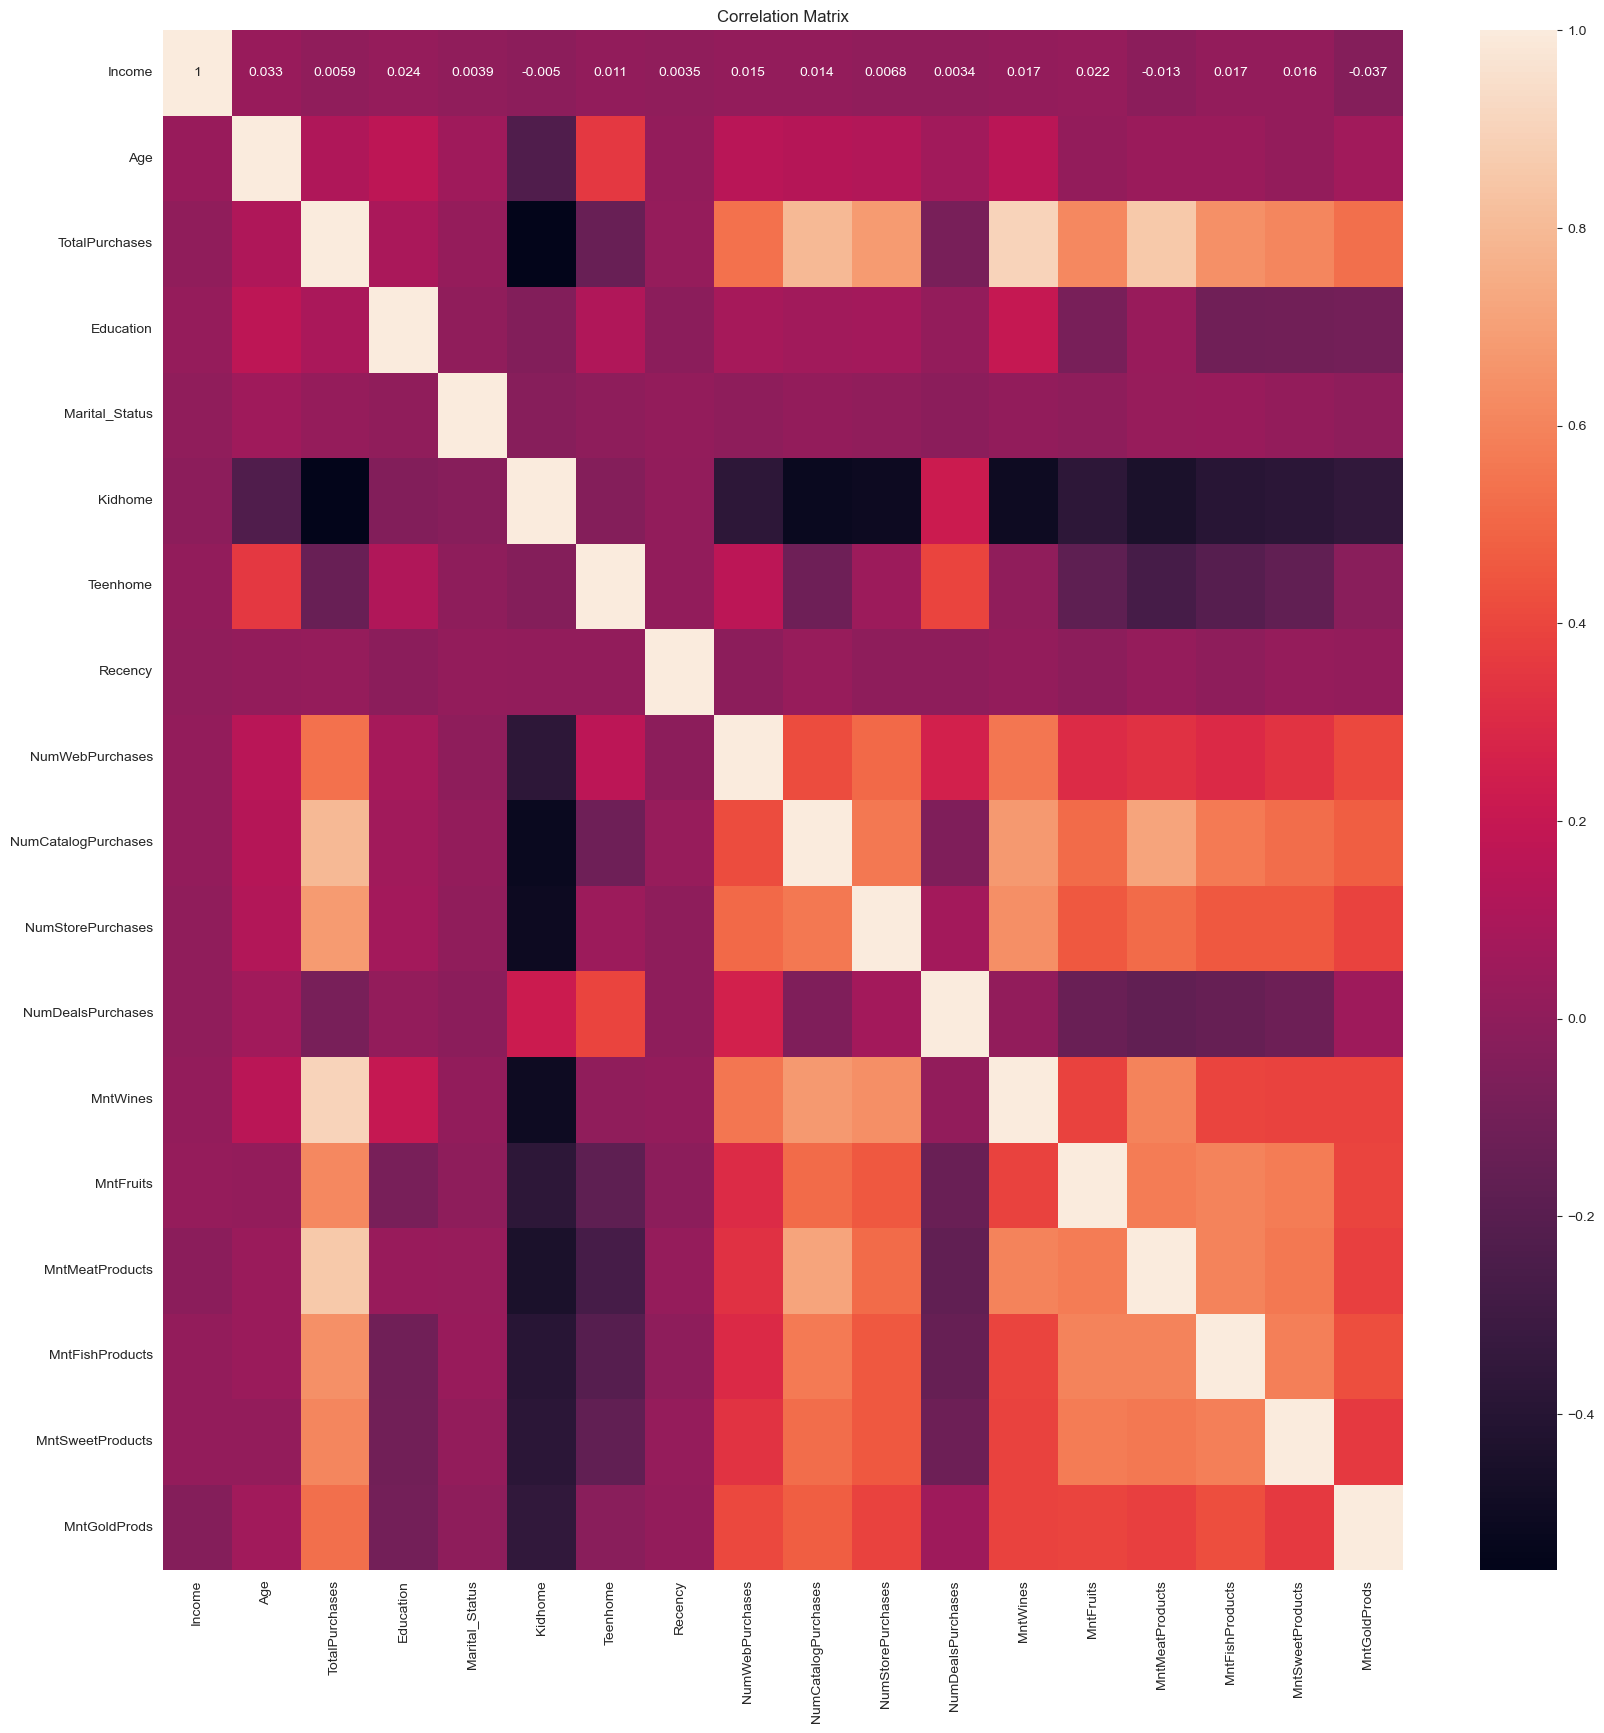

In [160]:
# now we can check the correlation between the features
plt.figure(figsize=(20, 20))
data_corr = cluster_df.corr('pearson')
sns.heatmap(data_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()